## Dataset Information

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Motivation behind the project:

The objective of this project is to develop a machine learning model for detecting fraudulent credit card transactions. This model is crucial for financial institutions, as it helps in protecting both businesses and consumers from financial losses caused by fraudulent activities. By accurately identifying fraudulent transactions, this model can mitigate risks, improve security measures, and maintain the integrity of the financial system.

Financial institutions, including banks, credit card companies, and payment processors, would benefit significantly from using such a model. By integrating it into their transaction monitoring systems, they can automatically flag suspicious transactions for further investigation, thereby reducing the financial impact of fraudulent activities on both the institution and its customers.


## Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset

In [13]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

Before diving into the analysis, let's explore the statistical summary of the dataset to understand the distribution and range of each feature.


## Statistical Information

In [3]:
# statistical info
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

Time:
The Time feature represents the time elapsed since the first transaction.
It ranges from 0 to 172792 units.
There are no apparent issues with the distribution, as the mean and standard deviation are reasonable.

Amount:
The Amount feature indicates the transaction amounts.
It varies from 0 to 25691.16 units.
The mean and standard deviation suggest significant variability in transaction amounts.
Further analysis may be needed to identify outliers or anomalies in transaction amounts.

V1 to V28:
These features are likely derived from some form of dimensionality reduction or feature engineering, given their anonymized nature.
They all exhibit means close to 0, indicating centered distributions.
The standard deviations vary, suggesting differences in the spread of the data among these features.
The minimum and maximum values show the range of values present in each feature.

In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All the input attributes(Time-Amount) are floats and the output attribute(Class) is an Integer.

## Preprocessing the dataset

In [5]:
# checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

It's important to check the distribution of the target variable 'Class' to understand the balance between fraudulent and non-fraudulent transactions.

In [6]:
#Class Distribution
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## Exploratory Data Analysis

**Ploting the distribution of the transactions outcome**

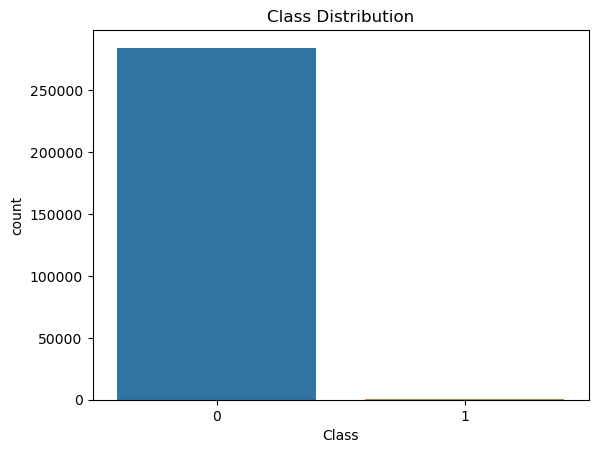

In [7]:
# Ploting the distribution of the transactions outcome
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

From the countplot, the classes 0 & 1 are highly imbalanced. Since most of the features are in PCA form except for Time and Amount therefore am going to create relationships using time and amount connecting them to fraud activities.

Now, let's visualize the distribution of numerical features to understand their spread and identify any potential outliers.
Plotting the colums having the transactions and droping the Time, Amount and Class columns.

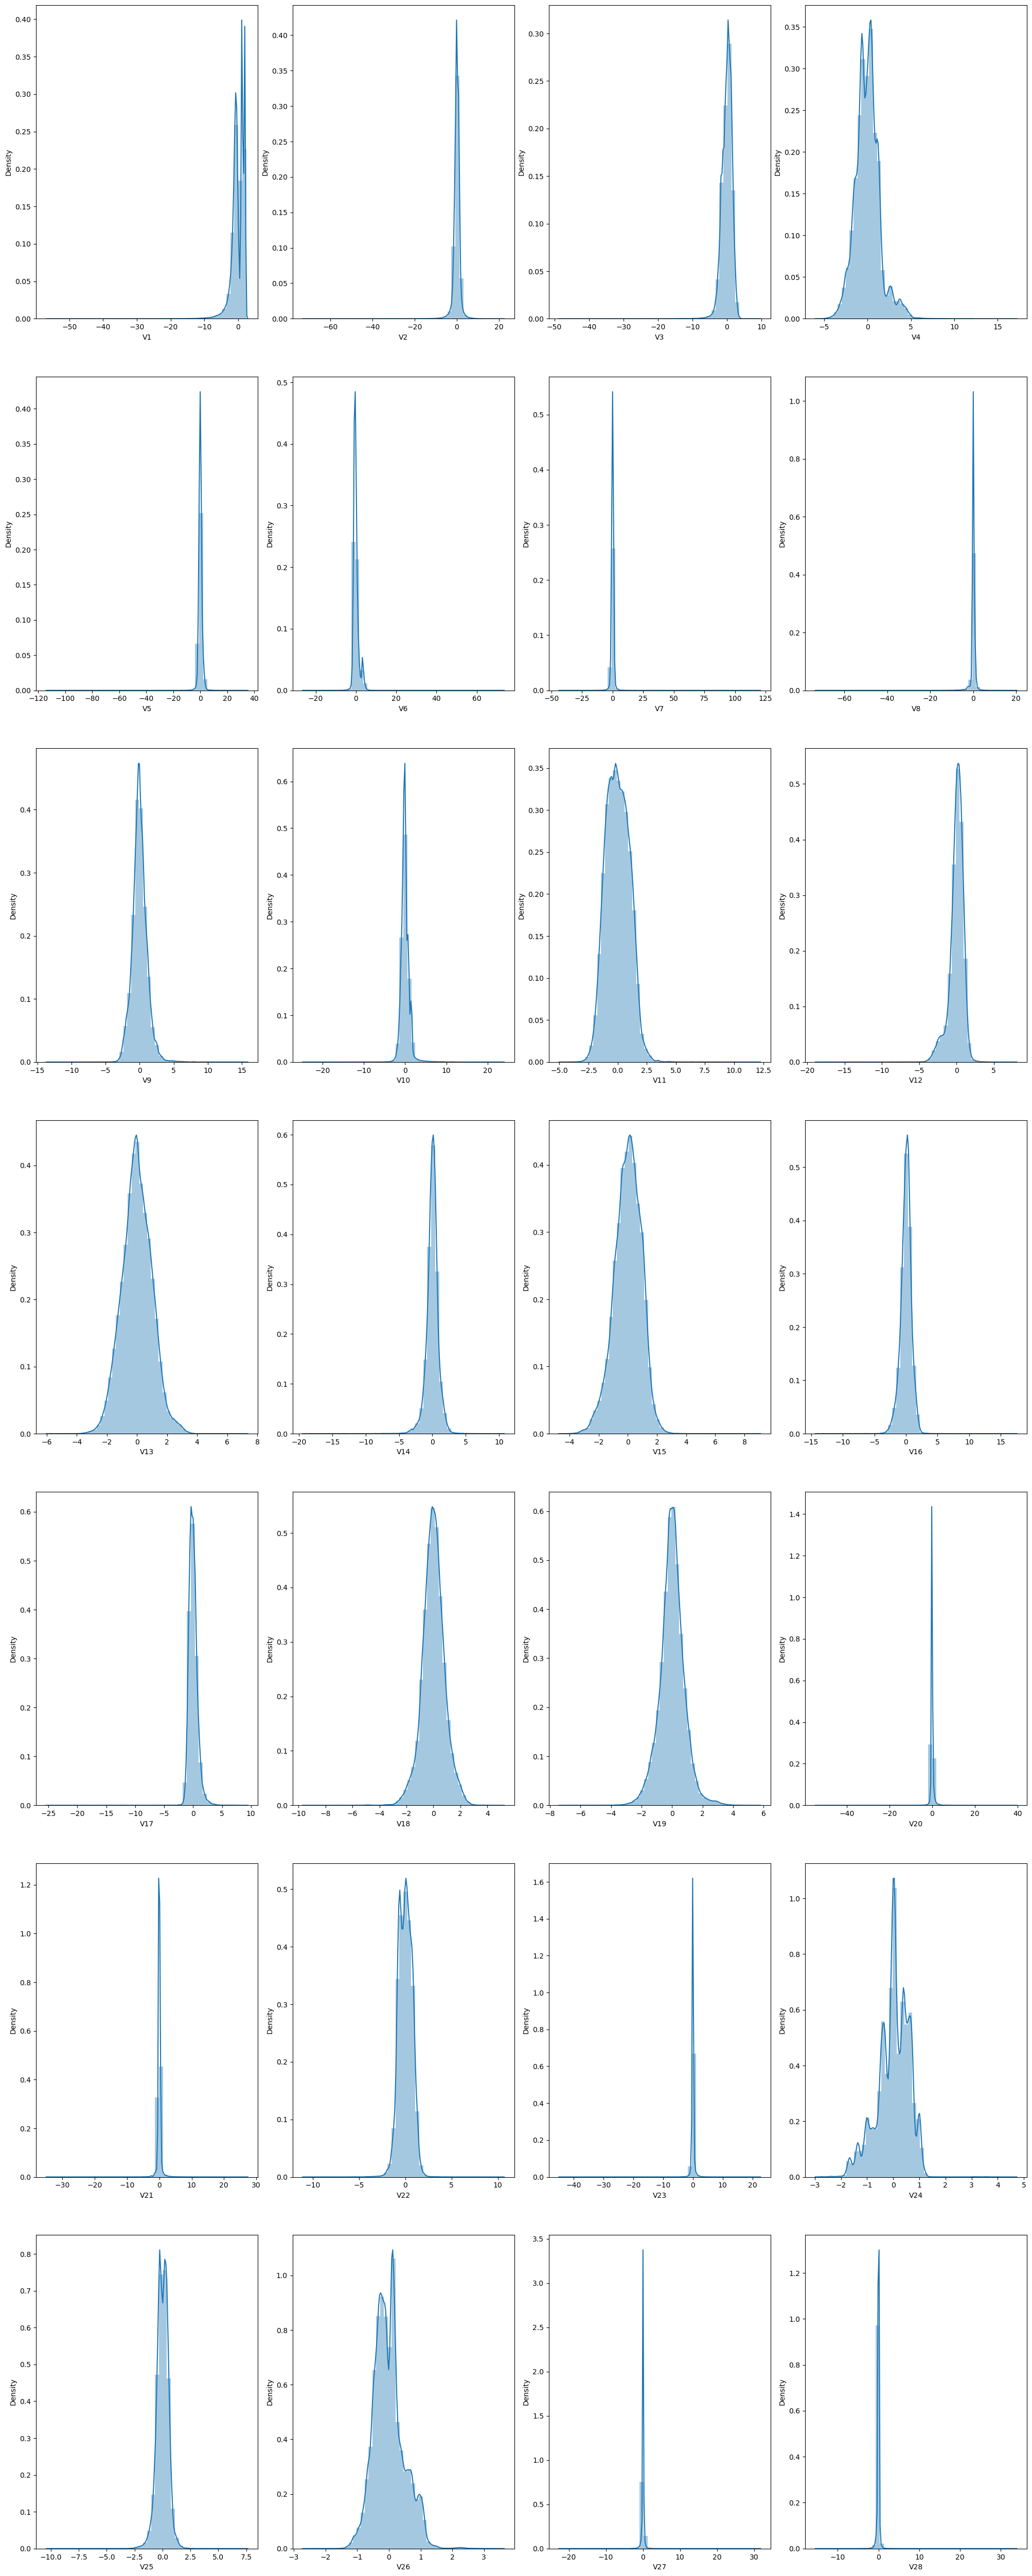

In [8]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

Most columns are showing a bell curve indicting Normal Distribution hence not require processing.

In order to use the basic algorithmic models like Logistic Regression, am going to pass these data into Standard Scalar.

**Checking for irregularities between the time and amount column as to use Standard Scaler.**

<Axes: xlabel='Time', ylabel='Density'>

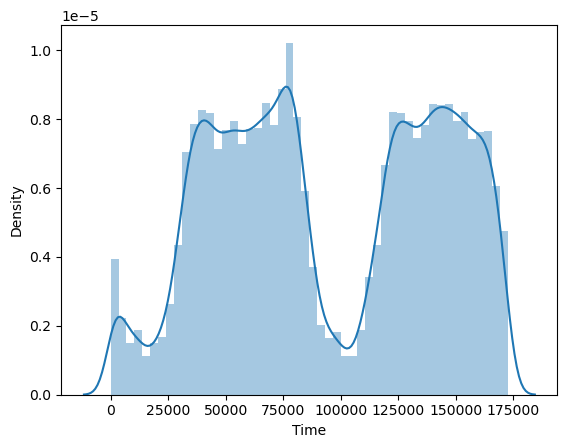

In [9]:
# Plotting the distribution of the time column
sns.distplot(df['Time'])

<Axes: xlabel='Amount', ylabel='Density'>

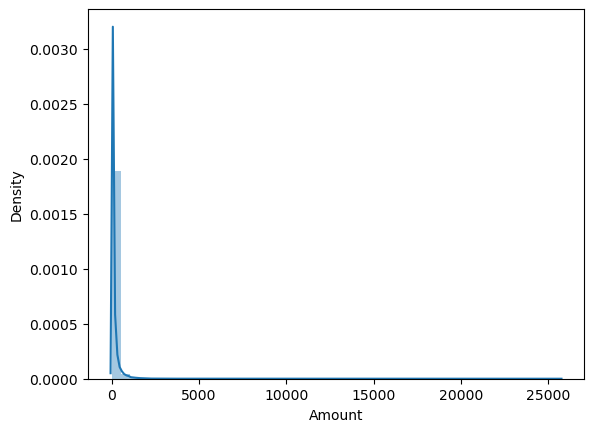

In [10]:
# Plotting the distribution of the Amount column
sns.distplot(df['Amount'])

Due to the irregularities in range, am going to pass these data into Standard Scalar.
Before that, we can have a look at Correlation Matrix.

## Coorelation Matrix



The correlation matrix is insignificant because of the lack of meaningful information. All the columns containing random pieces of information is dynamically reduced using PCA(Principle Component Analysis) transformation.

<Axes: >

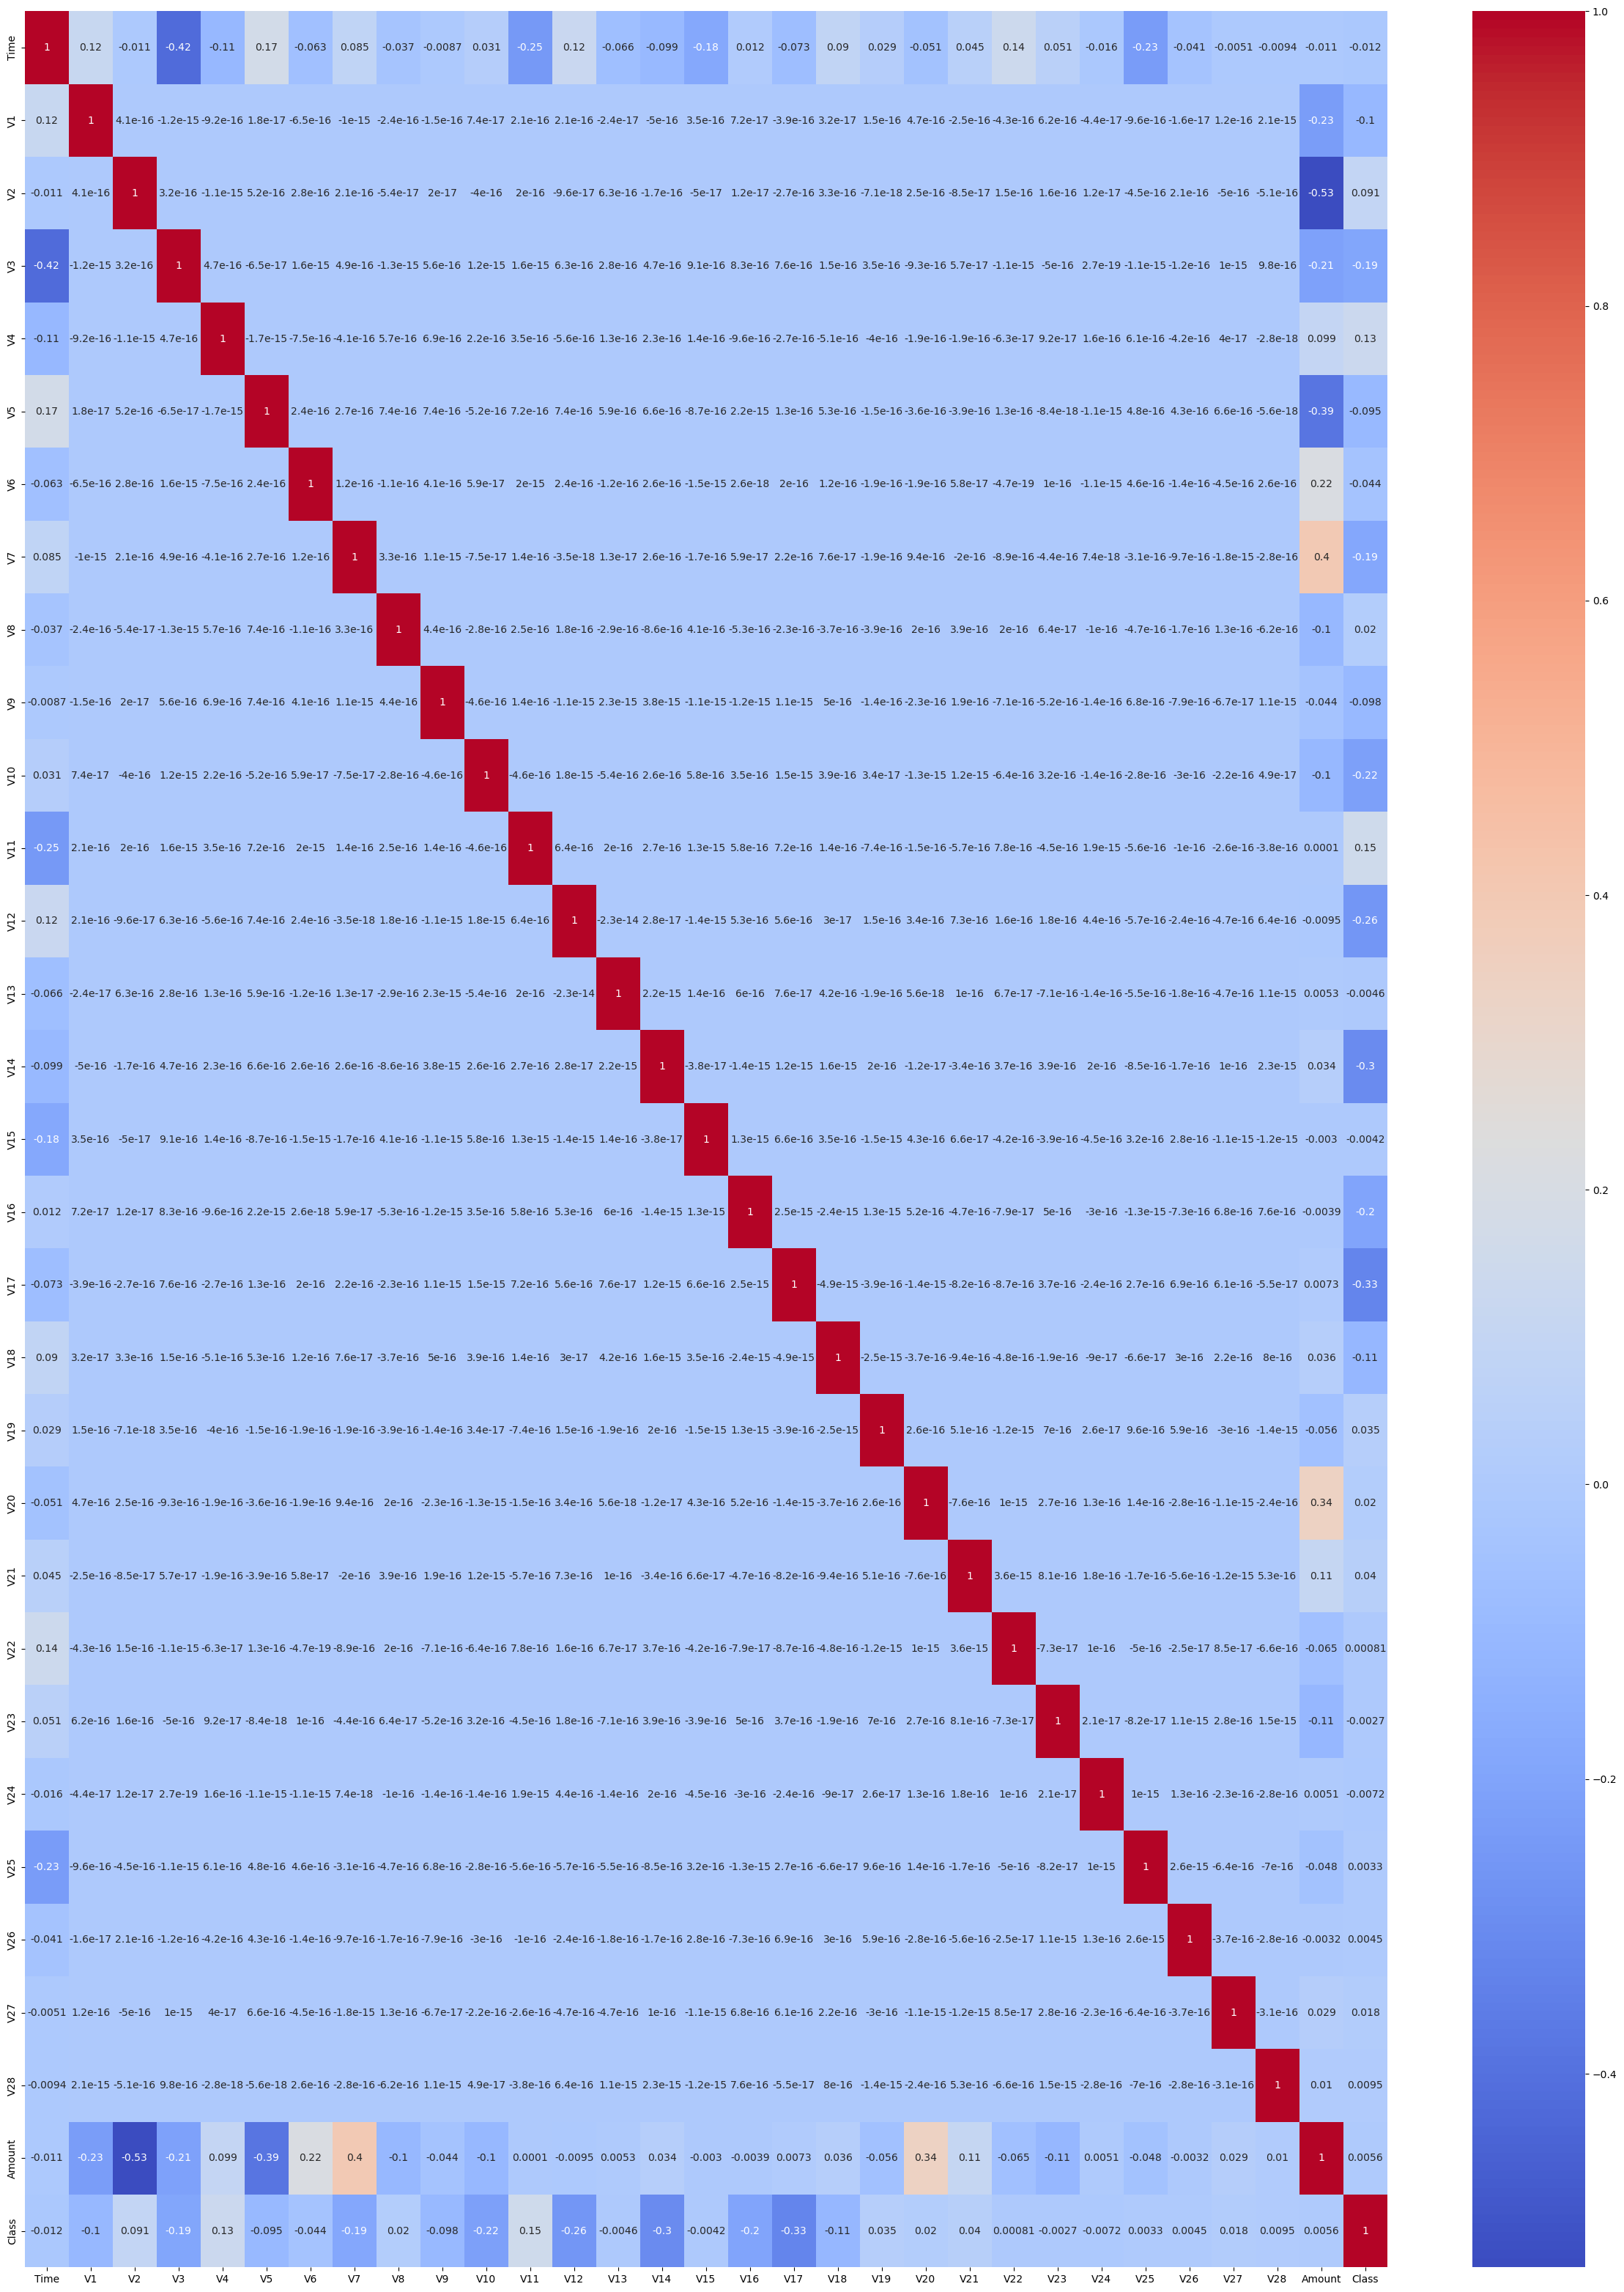

In [11]:
corr = df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

As you can notice from the correlation matrix above, there is correlation with respect to Amount.


## Splitting the dataset into features and targets

Storing the input attributes in variable X and output attributes in variable y

In [14]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [16]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## Carrying Out Standard Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both training and testing data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [20]:
## Printing the last element of x_scaler
x_scaler[-1]

array([ 1.64205773, -0.27233093, -0.11489898,  0.46386564, -0.35757   ,
       -0.00908946, -0.48760183,  1.27476937, -0.3471764 ,  0.44253246,
       -0.84072963, -1.01934641, -0.0315383 , -0.18898634, -0.08795849,
        0.04515766, -0.34535763, -0.77752147,  0.1997554 , -0.31462479,
        0.49673933,  0.35541083,  0.8861488 ,  0.6033653 ,  0.01452561,
       -0.90863123, -1.69685342, -0.00598394,  0.04134999,  0.51435531])

All the input attributes are in the X and y contains the output Class. After running the code, we see an array with a scaled value ranging from 0-1. 



## Model Training

To perform Model Training am going to use several different models like Logistic Regression, Random Forest, XGBoost, Desicion tree classifier, etc., Before that, we need to split the data.


Since the class is not balanced, am going to uniformly distribute class variables

**Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression
#intializing the model
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))
print("F1 Score:",f1_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.63      0.72       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.719626168224299


There's an accuracy score of 100%, this is due to standard scaling but the majority of the accuracy is based on Non-fraudulent samples.
The F1-Score is a combination of Precision and Recall since the F1 score is around 72%, am going to consider another model for training.

**Visualising the Results from the models**

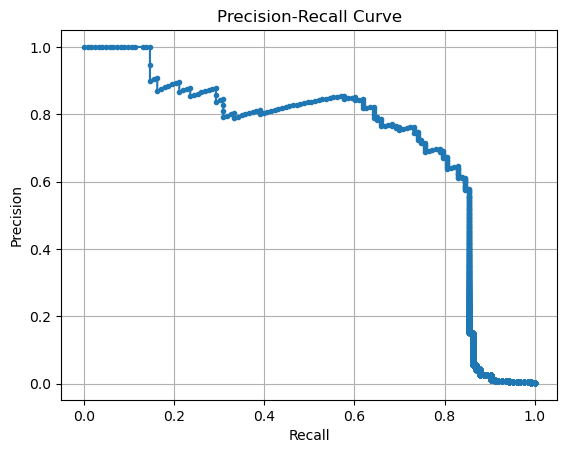

In [17]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import plotly.graph_objects as go

# Precision-Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


**Random Forest Classifier**

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))
print("F1 Score:",f1_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.77      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.8558558558558559


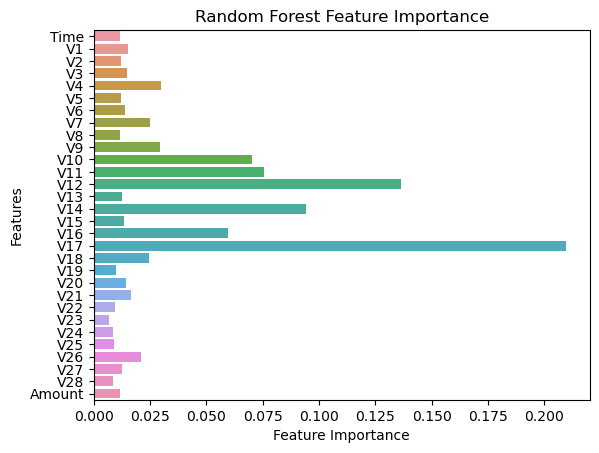

In [19]:
# Feature Importance Plot (Random Forest)
feature_importance = model.feature_importances_
feature_names = X.columns
plt.figure()
sns.barplot(x=feature_importance, y=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

Overall, these results suggest that the classifier performs exceptionally well for class 0, with perfect precision, recall, and F1-Score. However, for class 1, while the precision is high, the recall is relatively lower, indicating some difficulty in correctly identifying instances of class 1, possibly due to its smaller support compared to class 0. Despite this, the classifier achieves a high overall accuracy and F1-Scores, demonstrating strong performance.


**Decision Tree Classifier**

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier()
#training
model.fit(x_train,y_train)
#testing
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))
print("F1 Score:",f1_score(y_test, y_predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.73      0.69      0.71       123

    accuracy                           1.00     71202
   macro avg       0.86      0.85      0.85     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.7083333333333334


The F1 score is closely below that of the logistic regression suggesting that the decision tree classifier performs similarly to it. Since the score is low am going to consider another model.

Extreme Gradient Boost

In [11]:
import xgboost as xgb 
model = xgb.XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)
# testing
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))
print("F1 Score:",f1_score(y_test, y_predict))

# Save the trained model
model.save_model("xgb_model.json")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.79      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.8622222222222222


After running the code, we have to wait longer than usual due to the larger number of Data-Set values.Due to the large data-set values, the code takes long to run

The F1-Score has improved to 86%, which is a good result though due to unbalanced training, you are observing a low score.

However, let us try to balance this data and see if the results improve in terms of F1-Score and Macro Average.

**Model Comparison Plot**

In [22]:
# Model Comparison Plot
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost']
accuracies = [1.00, 1.00, 1.00, 1.00]
f1_scores = [0.7196, 0.8610, 0.7190, 0.8622]
precisions = [0.85, 0.96, 0.73, 0.95]
recalls = [0.63, 0.78, 0.71, 0.79]

fig = go.Figure(data=[
    go.Bar(name='Accuracy', x=models, y=accuracies),
    go.Bar(name='F1-Score', x=models, y=f1_scores),
    go.Bar(name='Precision', x=models, y=precisions),
    go.Bar(name='Recall', x=models, y=recalls)
])
fig.update_layout(barmode='group', title='Model Comparison')
fig.show()

Overall, XGBoost outperformed the other models in terms of F1-Score, precision, and recall, making it the best-performing model for this classification task.





